In [107]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

In [184]:
df = pd.read_csv('DataKind export.csv')
df.service_uploaded =  df.service_uploaded.apply(lambda x: datetime.strptime(x, '%b %d, %Y @ %H:%M:%S.%f'))

df['pms_pm01_0'] = df['pms_pm01_0'].str.replace(',', '').astype(float)
df['pms_pm10_0'] = df['pms_pm10_0'].str.replace(',', '').astype(float)
df['pms_pm02_5'] = df['pms_pm02_5'].str.replace(',', '').astype(float)


In [185]:
df.info()

df[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   service_uploaded  3009 non-null   datetime64[ns]
 1   device_urn        3009 non-null   object        
 2   loc_lat           2970 non-null   float64       
 3   loc_lon           2970 non-null   float64       
 4   env_temp          91 non-null     float64       
 5   env_humid         91 non-null     float64       
 6   pms_pm01_0        3008 non-null   float64       
 7   pms_pm02_5        3009 non-null   float64       
 8   pms_pm10_0        3009 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 211.7+ KB


,service_uploaded,device_urn,loc_lat,loc_lon,env_temp,env_humid,pms_pm01_0,pms_pm02_5,pms_pm10_0
0,2020-06-14 07:41:40,safecast:3714913954,52.395,4.875,NaN,NaN,20.00,34.00,41.00
1,2020-06-14 07:40:06,safecast:678194983,46.555,15.636,NaN,NaN,13.00,16.00,17.00
2,2020-06-14 07:13:22,note:dev:865284040070801,34.199,-118.140,NaN,NaN,0.53,0.90,2.05
3,2020-06-14 07:13:17,note:dev:865284040070801,34.199,-118.140,NaN,NaN,0.70,1.38,1.55
4,2020-06-14 07:11:36,safecast:3714913954,52.395,4.875,NaN,NaN,24.00,40.00,48.00
5,2020-06-14 07:10:06,safecast:678194983,46.555,15.636,NaN,NaN,11.00,14.00,14.00
6,2020-06-14 07:01:34,note:dev:865284040097945,34.122,-118.261,NaN,NaN,5.53,9.80,11.75
7,2020-06-14 07:01:28,note:dev:865284040097945,34.122,-118.261,NaN,NaN,3.78,6.03,6.48
8,2020-06-14 06:51:47,note:dev:865284040095238,34.122,-118.261,NaN,NaN,4.88,10.30,12.43
9,2020-06-14 06:51:41,note:dev:865284040095238,34.122,-118.261,NaN,NaN,2.05,5.13,5.80


In [186]:
devices = np.unique(df.device_urn.values)
print(len(devices))

31


In [187]:
pmVals = {1.0:'pms_pm01_0', 2.5:'pms_pm02_5', 10.0: 'pms_pm10_0'}

In [198]:
gf = df.groupby('device_urn')
gf.first()

,service_uploaded,loc_lat,loc_lon,env_temp,env_humid,pms_pm01_0,pms_pm02_5,pms_pm10_0
device_urn,,,,,,,,
note:dev:864475040028176,2020-06-08 15:35:10,30.522,-97.616,NaN,NaN,5.20,6.28,6.28
note:dev:864622040009397,2020-06-13 07:19:50,42.565,-70.784,NaN,NaN,0.00,0.18,0.18
note:dev:865284040070785,2020-06-14 06:28:16,34.122,-118.261,NaN,NaN,11.80,14.80,16.15
note:dev:865284040070801,2020-06-14 07:13:22,34.199,-118.140,NaN,NaN,0.53,0.90,2.05
note:dev:865284040083945,2020-06-14 06:43:28,35.665,139.705,NaN,NaN,18.88,28.93,33.65
note:dev:865284040095238,2020-06-14 06:51:47,34.122,-118.261,NaN,NaN,4.88,10.30,12.43
note:dev:865284040095295,2020-06-13 08:42:44,42.565,-70.784,NaN,NaN,0.00,0.00,0.00
note:dev:865284040097879,2020-06-14 06:30:38,34.065,-118.286,NaN,NaN,6.85,12.40,18.13
note:dev:865284040097945,2020-06-14 07:01:34,34.122,-118.261,NaN,NaN,5.53,9.80,11.75


In [189]:
df['env_humid'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
3004    True
3005    True
3006    True
3007    True
3008    True
Name: env_humid, Length: 3009, dtype: bool

In [199]:
def plotPMsGrouped(pm):
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = iter(cm.rainbow(np.linspace(0, 1, len(devices))))
    for device in devices:
        s1  = gf.get_group(device)
        ax.scatter(s1['service_uploaded'].values ,s1[pmVals[pm]], label='{}'.format(device), color= next(colors))
    
    # Set title and labels for axes
    ax.set(xlabel="Date-Time", ylabel="PM "+str(pm),title = "{}".format(pm))
    ax.legend()
    plt.show()

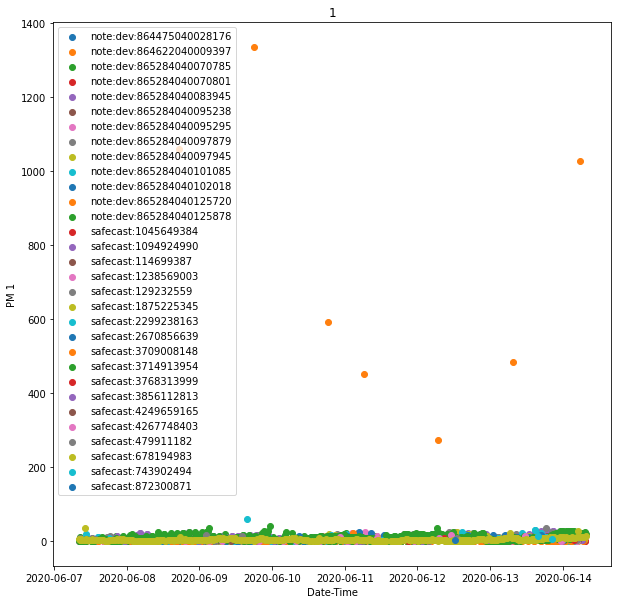

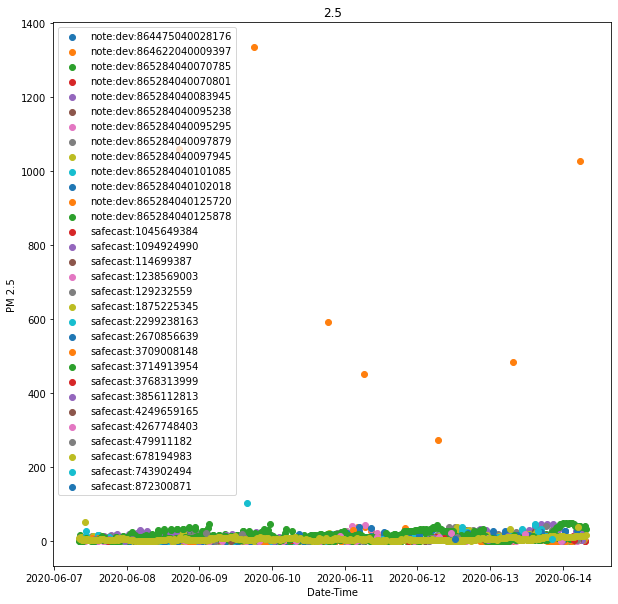

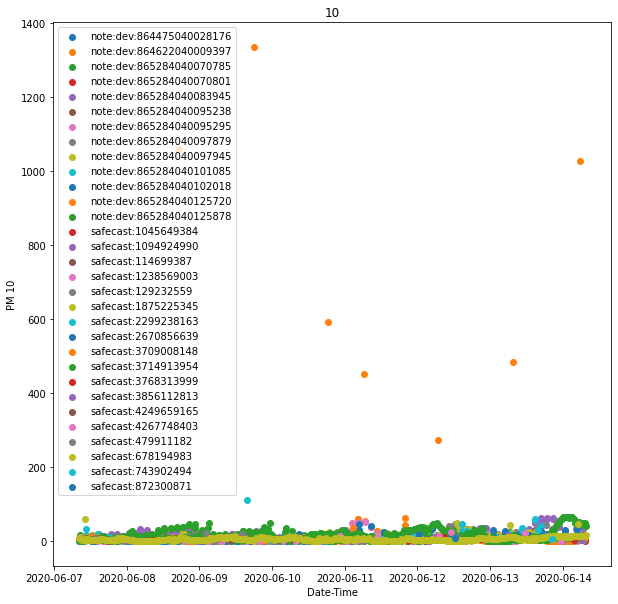

In [197]:
plotPMsGrouped(1)
plotPMsGrouped(2.5)
plotPMsGrouped(10)

In [209]:
a='1.0.1.'.split('.')
len(a[3])==0

True